In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_train = pd.read_csv('Titanic_train.csv')
data_test = pd.read_csv('Titanic_test.csv')

# Data Overview

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Test Outliers
def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v>n)
    return multiple_outliers

In [7]:
data1 = data_train.copy()

In [8]:
Outliers_to_drop = detect_outliers(data1,2,['Age','Parch','Fare','SibSp'])
data1.iloc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [9]:
data2 = data1.drop(Outliers_to_drop).reset_index(drop=True)
data3 = data2.copy()

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [11]:
data2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# EDA & Feature Engineering

In [12]:
def categorical_plot(df, feature):
    sns.countplot(data=df, x=feature)
    sns.factorplot(data=df, x=feature,y ='Survived', kind='bar')

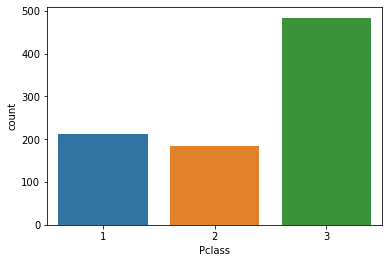

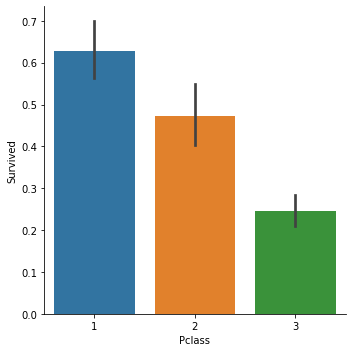

In [13]:
# Pclass
categorical_plot(data2, 'Pclass')

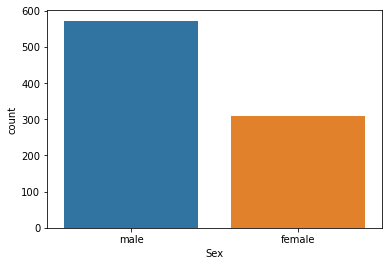

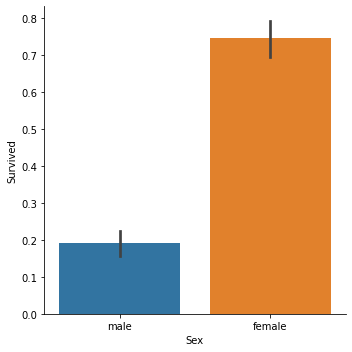

In [14]:
# Sex
categorical_plot(data2, 'Sex')

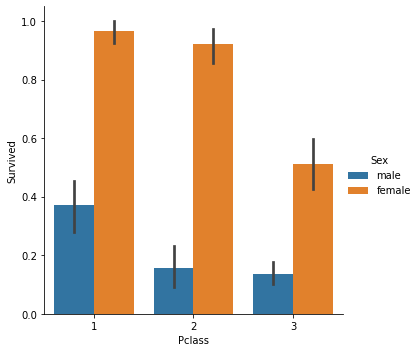

In [15]:
sns.factorplot(data=data2, x='Pclass',y ='Survived', hue='Sex',kind='bar')

In [16]:
data2['Sex'] = data2['Sex'].apply(lambda x: 1 if x=='male' else 0)

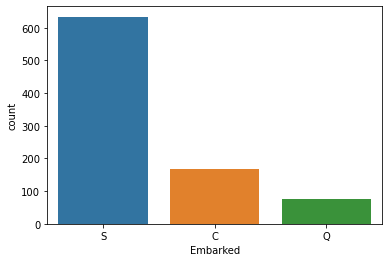

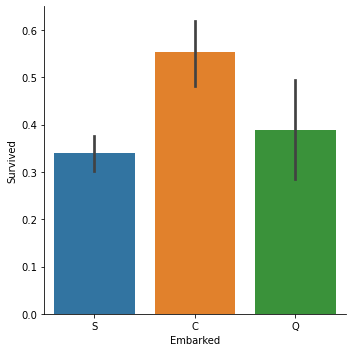

In [17]:
# Embark
categorical_plot(data2, 'Embarked')

In [18]:
data2['Embarked'] = data2.Embarked.fillna('S')

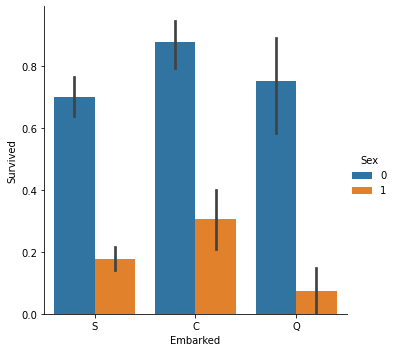

In [19]:
sns.factorplot(data=data2, x='Embarked', y ='Survived', hue='Sex',kind='bar')

In [20]:
# Cabin
data2['Cabin_Initial'] = data2['Cabin'].apply(lambda x: 'NA' if pd.isna(x) else str(x)[0])
data2.Cabin_Initial.value_counts()

NA    680
C      56
B      47
D      33
E      32
A      15
F      13
G       4
T       1
Name: Cabin_Initial, dtype: int64

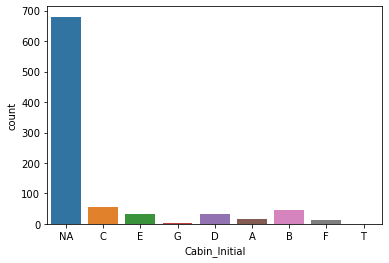

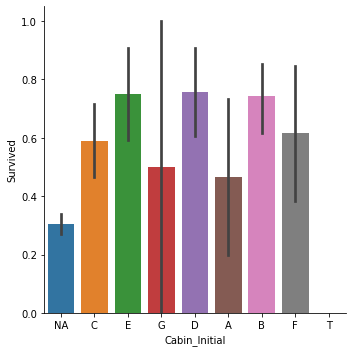

In [21]:
categorical_plot(data2, 'Cabin_Initial')

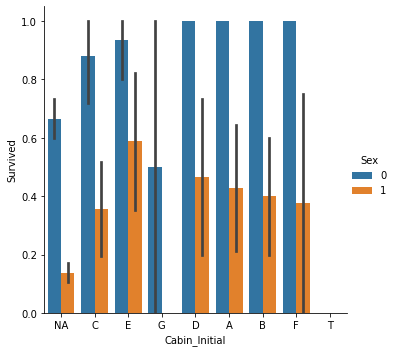

In [22]:
sns.factorplot(data=data2, x='Cabin_Initial', y ='Survived', hue='Sex',kind='bar')

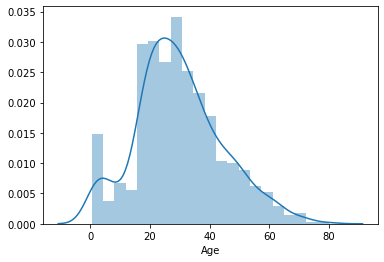

In [23]:
# Age
sns.distplot(data2[-(data2['Age'].isna())].Age)

In [24]:
data2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Initial
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NA


In [25]:
na_index = list(data2[data2['Age'].isna()].index)
age_median = data2[-(data2['Age'].isna())].Age.median()
for i in na_index:
    age_median2 = data2[((data2['Sex']==data2.iloc[i]['Sex'])&(data2['SibSp']==data2.iloc[i]['SibSp'])&(data2['Parch']==data2.iloc[i]['Parch']))]['Age'].median()
    if not np.isnan(age_median2):
        data2['Age'].iloc[i] = age_median2
    else:
        data2['Age'].iloc[i] = age_median

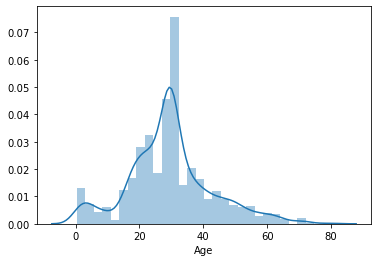

In [26]:
sns.distplot(data2.Age)

In [27]:
data2['Age_bucket'] = pd.cut(data2['Age'], 6, labels=['A','B','C','D','E','F'])

In [28]:
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Initial,Age_bucket
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NA,B
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NA,B
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,NA,C


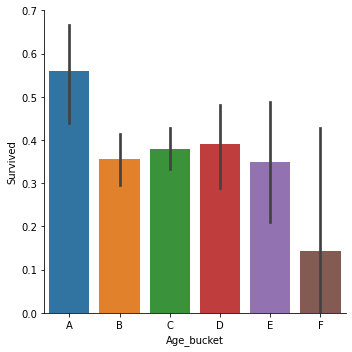

In [29]:
sns.factorplot(data=data2, x='Age_bucket', y='Survived',kind='bar')

In [30]:
def age_gap(x):
    if x < 8:
        return 'A'
    elif x < 12:
        return 'B'
    elif x < 18:
        return 'C'
    elif x < 50:
        return 'D'
    elif x < 60:
        return 'E'
    else:
        return 'F'

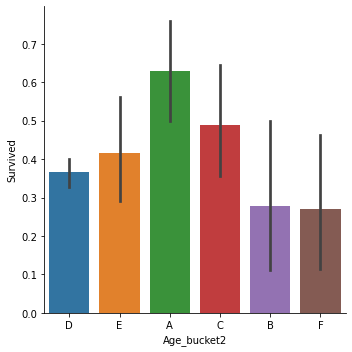

In [31]:
data2['Age_bucket2'] = data2['Age'].apply(age_gap)
sns.factorplot(data=data2, x='Age_bucket2', y='Survived',kind='bar')

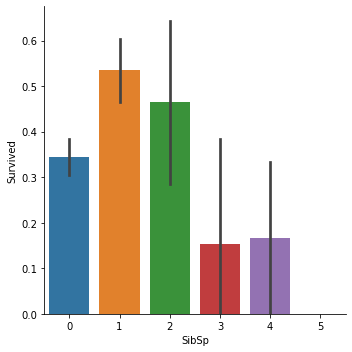

In [32]:
# SibSp
sns.factorplot(data=data2, x='SibSp', y='Survived',kind='bar')

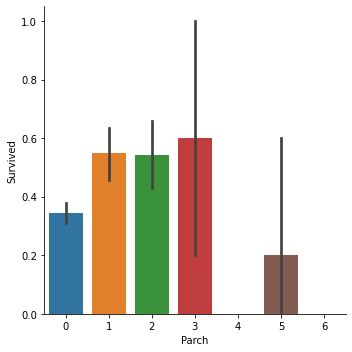

In [33]:
sns.factorplot(data=data2, x='Parch', y='Survived',kind='bar')

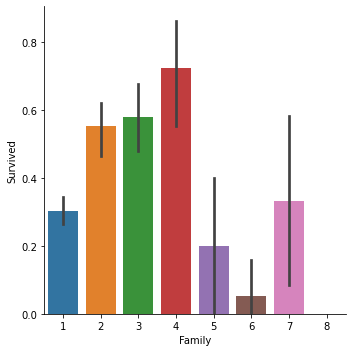

In [34]:
data2['Family'] = data2['Parch']+data2['SibSp']+1
sns.factorplot(data=data2, x='Family', y='Survived',kind='bar')

In [35]:
# Name
data2['Title'] = data2['Name'].map(lambda i: i.split(',')[1].split('.')[0].strip())
data2['Title'].value_counts()

Mr              513
Miss            177
Mrs             125
Master           39
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Ms                1
Lady              1
Mme               1
Name: Title, dtype: int64

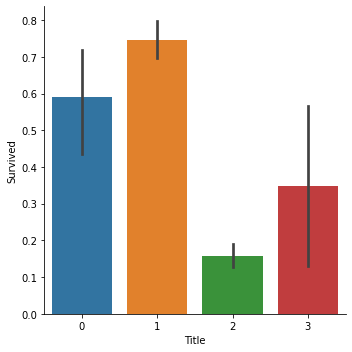

In [36]:
data2['Title'] = data2['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data2['Title'] = data2['Title'].map({'Master':0, 'Miss':1, 'Ms' : 1 , 'Mme':1, 'Mlle':1, 'Mrs':1, 'Mr':2, 'Rare':3})
data2['Title'] = data2['Title'].astype(int)

sns.factorplot(data=data2, x='Title', y='Survived',kind='bar')

In [37]:
# Ticket
data2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Initial,Age_bucket,Age_bucket2,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NA,B,D,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,C,D,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NA,B,D,1,1


In [38]:
data2['Ticket_Initial'] = data2['Ticket'].apply(lambda x: 'NA' if x.isdigit() else 
                                               x.replace('.','').replace('/','').strip().split(' ')[0])
data2[['Ticket_Initial','Survived']].groupby(by='Ticket_Initial', as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Ticket_Initial,
SC,1.000000
SWPP,1.000000
FCC,0.800000
SCAH,0.666667
PP,0.666667
PC,0.650000
SCParis,0.500000
STONO2,0.500000
PPP,0.500000


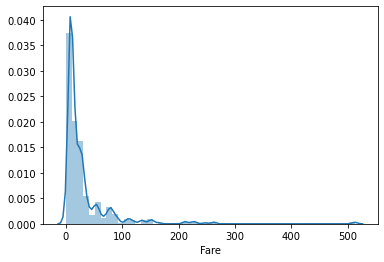

In [39]:
# Fare
sns.distplot(data2.Fare)

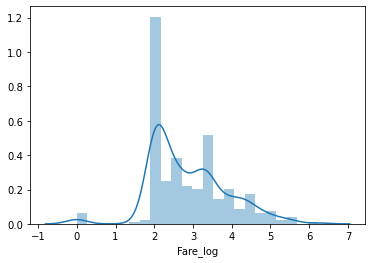

In [40]:
data2['Fare_log'] = data2['Fare'].apply(lambda x: np.log(x) if x !=0 else 0)
sns.distplot(data2.Fare_log)

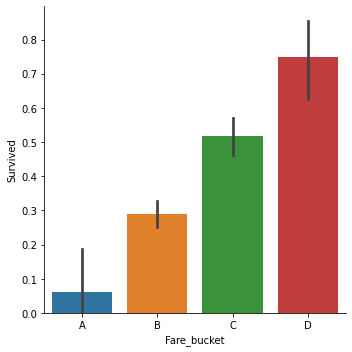

In [41]:
data2['Fare_bucket'] = pd.cut(data2['Fare_log'], bins=4, labels=['A','B','C','D'])
sns.factorplot(data=data2, x='Fare_bucket', y='Survived',kind='bar')

In [42]:
# Concat
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
data_all = pd.concat([data3, data_test], axis=0).reset_index(drop=True)
train_len = len(data3)

In [44]:
data_all['Embarked'] = data_all.Embarked.fillna('S')
data_all['Cabin_Initial'] = data_all['Cabin'].apply(lambda x: 'NA' if pd.isna(x) else str(x)[0])

na_index = list(data_all[data_all['Age'].isna()].index)
age_median = data_all[-(data_all['Age'].isna())].Age.median()
for i in na_index:
    age_median2 = data_all[((data_all['Sex']==data_all.iloc[i]['Sex'])&(data_all['SibSp']==data_all.iloc[i]['SibSp'])&(data_all['Parch']==data_all.iloc[i]['Parch']))]['Age'].median()
    if not np.isnan(age_median2):
        data_all['Age'].iloc[i] = age_median2
    else:
        data_all['Age'].iloc[i] = age_median
        
data_all['Age_bucket2'] = data_all['Age'].apply(age_gap)

data_all['Family'] = data_all['Parch']+data_all['SibSp']+1
data_all['Title'] = data_all['Name'].map(lambda i: i.split(',')[1].split('.')[0].strip())
data_all['Title'] = data_all['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data_all['Title'] = data_all['Title'].map({'Master':0, 'Miss':1, 'Ms' : 1 , 'Mme':1, 'Mlle':1, 'Mrs':1, 'Mr':2, 'Rare':3})
data_all['Title'] = data_all['Title'].astype(int)

data_all['Ticket_Initial'] = data_all['Ticket'].apply(lambda x: 'NA' if x.isdigit() else 
                                               x.replace('.','').replace('/','').strip().split(' ')[0])
data_all['Fare_log'] = data_all['Fare'].apply(lambda x: np.log(x) if x !=0 else 0)
data_all['Fare_bucket'] = pd.cut(data_all['Fare_log'], bins=4, labels=['A','B','C','D'])

In [45]:
data_all.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Initial,Age_bucket2,Family,Title,Ticket_Initial,Fare_log,Fare_bucket
1294,1305,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S,NA,D,1,2,A5,2.085672,B
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C,D,1,3,PC,4.690430,D
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NA,D,1,2,SOTONOQ,1.981001,B
1297,1308,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,NaN,S,NA,D,1,2,NA,2.085672,B
1298,1309,NaN,3,"Peter, Master. Michael J",male,26.0,1,1,2668,22.3583,NaN,C,NA,D,3,0,NA,3.107198,B


In [46]:
# Dummy variables
dummies_Age = pd.get_dummies(data_all['Age_bucket2'], prefix='Age_bucket2')
dummies_Cabin = pd.get_dummies(data_all['Cabin_Initial'], prefix='Cabin_Initial')
dummies_Embarked = pd.get_dummies(data_all['Embarked'], prefix='Embarked')
dummies_Fare = pd.get_dummies(data_all['Fare_bucket'], prefix='Fare_bucket')
dummies_Ticket = pd.get_dummies(data_all['Ticket_Initial'], prefix='Ticket_Initial')
dummies_Pclass = pd.get_dummies(data_all['Pclass'], prefix='Pclass')
dummies_Sex = pd.get_dummies(data_all['Sex'], prefix='Sex')
dummies_Family = pd.get_dummies(data_all['Family'], prefix='Family')
dummies_Name = pd.get_dummies(data_all['Title'], prefix='Title')

data_all = pd.concat([data_all, dummies_Age, dummies_Cabin, dummies_Embarked, dummies_Fare,
                     dummies_Ticket,dummies_Pclass,dummies_Sex,dummies_Family,dummies_Name], axis=1)

In [47]:
data_all.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_4,Family_5,Family_6,Family_7,Family_8,Family_11,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,0,0


In [53]:
train_df = data_all[:train_len].filter(regex='Age_bucket2_.*|Fare_bucket_.*|Cabin_Initial_.*|Embarked_.*|Sex_.*|Pclass_.*|Family_.*|Ticket_Initial_.*|Title_.*')
test_df = data_all[train_len:].filter(regex='Age_bucket2_.*|Fare_bucket_.*|Cabin_Initial_.*|Embarked_.*|Sex_.*|Pclass_.*|Family_.*|Ticket_Initial_.*|Title_.*')

train = train_df.values
test = test_df.values

X = train
y = data_all[:train_len]['Survived'].values

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Model Selection & GridSearch

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

In [67]:
C = [0.001,0.01,0.1,1,10,100]
penalty = ['l1','l2']

param_grid = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(lgr, param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(X_train, y_train)

result_lgr = pd.DataFrame(grid_result.cv_results_)
result_lgr.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.024465,0.002065,0.000401,0.000491,1,l2,"{'C': 1, 'penalty': 'l2'}",0.757576,0.795455,0.803030,0.803030,0.833333,0.798485,0.024242,1
9,0.032086,0.004993,0.000401,0.000491,10,l2,"{'C': 10, 'penalty': 'l2'}",0.780303,0.772727,0.803030,0.803030,0.825758,0.796970,0.018803,2
5,0.010227,0.000751,0.000401,0.000492,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.742424,0.810606,0.818182,0.780303,0.818182,0.793939,0.029302,3
11,0.032886,0.005011,0.000602,0.000492,100,l2,"{'C': 100, 'penalty': 'l2'}",0.750000,0.757576,0.803030,0.787879,0.810606,0.781818,0.024148,4
3,0.006621,0.002251,0.001002,0.000002,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.750000,0.871212,0.780303,0.734848,0.750000,0.777273,0.049237,5
1,0.008422,0.003082,0.000401,0.000491,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.613636,0.613636,0.613636,0.613636,0.621212,0.615152,0.003030,6
0,0.000191,0.000383,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,0.000000,0.000000,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,0.000000,0.000000,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
6,0.000200,0.000401,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [68]:
best_lgr = grid_search.best_estimator_
y_pred = best_lgr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8461538461538461


## Random Forest 

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [60]:
n_estimators = [i for i in range(50,350,10)]
max_depth = [i for i in range(7,13,1)]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

grid_search = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(X_train, y_train)

result_rfc = pd.DataFrame(grid_result.cv_results_)
result_rfc.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
93,0.106275,0.004041,0.007427,0.000502,10,80,"{'max_depth': 10, 'n_estimators': 80}",0.825758,0.856061,0.848485,0.833333,0.825758,0.837879,0.012309,1
71,0.265313,0.012889,0.016636,0.002258,9,160,"{'max_depth': 9, 'n_estimators': 160}",0.825758,0.840909,0.856061,0.833333,0.825758,0.836364,0.011338,2
60,0.067791,0.003381,0.005209,0.000404,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.825758,0.848485,0.856061,0.818182,0.825758,0.834848,0.014690,3
51,0.340312,0.006461,0.022452,0.000498,8,260,"{'max_depth': 8, 'n_estimators': 260}",0.818182,0.833333,0.848485,0.833333,0.840909,0.834848,0.010050,3
90,0.066371,0.000425,0.004611,0.000491,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.825758,0.840909,0.840909,0.825758,0.833333,0.833333,0.006776,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.068782,0.001361,0.005021,0.000012,12,50,"{'max_depth': 12, 'n_estimators': 50}",0.795455,0.780303,0.818182,0.825758,0.818182,0.807576,0.017008,176
12,0.216376,0.004929,0.014640,0.000494,7,170,"{'max_depth': 7, 'n_estimators': 170}",0.803030,0.810606,0.833333,0.772727,0.818182,0.807576,0.020101,176
13,0.242456,0.010971,0.015630,0.000495,7,180,"{'max_depth': 7, 'n_estimators': 180}",0.787879,0.803030,0.840909,0.772727,0.825758,0.806061,0.024711,178
3,0.105684,0.007515,0.007015,0.000027,7,80,"{'max_depth': 7, 'n_estimators': 80}",0.780303,0.803030,0.840909,0.780303,0.818182,0.804545,0.023177,179


In [61]:
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.832579185520362


## Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

In [63]:
n_estimators = [i for i in range(50,350,10)]
max_depth = [i for i in range(7,13,1)]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

grid_search = GridSearchCV(gbc, param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(X_train, y_train)

result_gbc = pd.DataFrame(grid_result.cv_results_)
result_gbc.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.176268,0.003782,0.001009,0.000012,7,70,"{'max_depth': 7, 'n_estimators': 70}",0.795455,0.818182,0.840909,0.825758,0.825758,0.821212,0.014845,1
5,0.243849,0.006873,0.001205,0.000400,7,100,"{'max_depth': 7, 'n_estimators': 100}",0.787879,0.810606,0.856061,0.833333,0.818182,0.821212,0.022778,1
0,0.134963,0.005349,0.001000,0.000003,7,50,"{'max_depth': 7, 'n_estimators': 50}",0.787879,0.810606,0.840909,0.833333,0.818182,0.818182,0.018557,3
1,0.162426,0.010206,0.001010,0.000013,7,60,"{'max_depth': 7, 'n_estimators': 60}",0.787879,0.795455,0.848485,0.833333,0.825758,0.818182,0.022978,3
7,0.282952,0.003671,0.001011,0.000015,7,120,"{'max_depth': 7, 'n_estimators': 120}",0.795455,0.795455,0.833333,0.833333,0.825758,0.816667,0.017539,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.073253,0.084581,0.002408,0.000489,11,200,"{'max_depth': 11, 'n_estimators': 200}",0.750000,0.795455,0.803030,0.810606,0.818182,0.795455,0.023957,176
133,1.064028,0.055673,0.002808,0.000401,11,180,"{'max_depth': 11, 'n_estimators': 180}",0.772727,0.780303,0.803030,0.803030,0.818182,0.795455,0.016598,176
129,0.610010,0.035462,0.002018,0.000014,11,140,"{'max_depth': 11, 'n_estimators': 140}",0.780303,0.765152,0.803030,0.810606,0.818182,0.795455,0.019755,176
141,1.260360,0.057415,0.003409,0.000490,11,260,"{'max_depth': 11, 'n_estimators': 260}",0.750000,0.787879,0.810606,0.803030,0.825758,0.795455,0.025802,179


In [64]:
best_gbc = grid_search.best_estimator_
y_pred = best_gbc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8371040723981901
